# 正则化的多分类多项式逻辑回归

> - 魏宇翔
> - 汪政
> - 冯宇霄
> - 涂欣宇

## 介绍

在这个 notebook 里面，我们调用了我们实现的**正则化的多项式逻辑回归**模型：

- 多元的逻辑回归模型
- 进行**多分类**任务
- 通过传入参数 `basis function` 实现多项式线性回归
- 引入了正则化，可以通过调整正则化参数 `reg_lambda` 进行实验

我们生成了三个区域的数据进行实验。

## 实验过程

首先，安装需要的依赖库，并添加 `PYTHONPATH`

In [9]:
!pip install -r ../requirements.txt || pip3 install -r ../requirements.txt

import sys
sys.path.append("..")

Could not build wheels for numpy, since package 'wheel' is not installed.
Could not build wheels for matplotlib, since package 'wheel' is not installed.
Could not build wheels for pandas, since package 'wheel' is not installed.
Could not build wheels for python-dateutil, since package 'wheel' is not installed.
Could not build wheels for pyparsing, since package 'wheel' is not installed.
Could not build wheels for cycler, since package 'wheel' is not installed.
Could not build wheels for kiwisolver, since package 'wheel' is not installed.
Could not build wheels for pytz, since package 'wheel' is not installed.
Could not build wheels for six, since package 'wheel' is not installed.


其次，引入所需要的第三方库以及我们的模型

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from linear_models.multiple_classification_model import MultipleClassificationModel

接下来，定义我们的数据类型 `Data`

In [11]:
# 在一个长方形方形区域内随机生成 count 个点
def gen_random_square(start_x, start_y, end_x, end_y, count):
    return np.append(np.random.uniform(start_x, end_x, count).reshape(-1, 1),
                     np.random.uniform(start_y, end_y, count) .reshape(-1, 1),
                     axis=1)

class Data:
    class_a = gen_random_square(0, 0, 5, 5, 10)
    class_b = gen_random_square(3, 3, 8, 8, 10)
    class_c = gen_random_square(7, 0, 12, 5, 10)

    X_a = np.concatenate((np.ones(class_a.shape[0]).reshape(-1, 1), class_a), axis=1)
    X_b = np.concatenate((np.ones(class_b.shape[0]).reshape(-1, 1), class_b), axis=1)
    X_c = np.concatenate((np.ones(class_c.shape[0]).reshape(-1, 1), class_c), axis=1)

    y_a = np.repeat(0, class_a.shape[0])
    y_b = np.repeat(1, class_b.shape[0])
    y_c = np.repeat(2, class_c.shape[0])

    X = np.concatenate((X_a, X_b, X_c))
    y = np.concatenate((y_a, y_b, y_c))

定义模型，加载输入数据，`basis_func` 默认为恒等映射

In [12]:
model = MultipleClassificationModel(
    Data.X, Data.y,
    reg_lambda=0.02
)

定义一个函数绘出这三个区域的点，之后也会使用

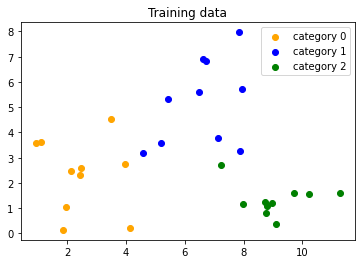

In [13]:
def plot_truth():
    plt.scatter(Data.class_a[:, 0], Data.class_a[:, 1], color="orange", label="category 0")
    plt.scatter(Data.class_b[:, 0], Data.class_b[:, 1], color="blue", label="category 1")
    plt.scatter(Data.class_c[:, 0], Data.class_c[:, 1], color="green", label="category 2")

plot_truth()
plt.legend()
plt.title("Training data")
plt.show()

对模型进行梯度下降训练 (one-vs-all 方法)，可以自由调整参数。同时定义决策边界绘图函数，供之后调用。

In [14]:
model.basis_func = lambda x: x
model.learn(learning_rate=0.3, epochs=500)

def plot_decision_boundaries():
    def plot_single_decision_boundary(model, color):
        u = np.linspace(0, 12, 80)
        v = np.linspace(0, 8, 80)

        z = np.zeros((u.size, v.size))
        # Evaluate z = theta*x over the grid
        for i, ui in enumerate(u):
            for j, vj in enumerate(v):
                mapped_value = model.basis_func(np.array([1, ui, vj]))
                std_right_side = (mapped_value[1:] - model.mean) / model.std
                first_column = mapped_value[0]
                mapped_value = np.append(first_column, std_right_side)
                z[i, j] = np.dot(mapped_value, model.params)

        z = z.T
        plt.contour(u, v, z, levels=[0], linewidths=2, colors=[color])

    plot_truth()
    plot_single_decision_boundary(model.learned_models[0][0], "red")
    plot_single_decision_boundary(model.learned_models[1][0], "purple")
    plot_single_decision_boundary(model.learned_models[2][0], "orange")

    plt.legend()
    plt.title("Decision boundaries")
    plt.show()

展示模型训练结果。由于是 one-vs-all，所以有三个决策边界

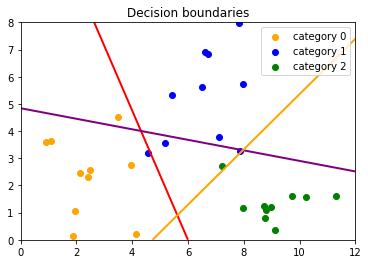

In [15]:
plot_decision_boundaries()

可以改变模型的基本函数，使决策边界非线性

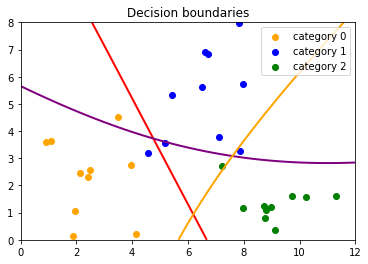

In [16]:
model.basis_func = lambda x: np.array([1,
                                       x[1],
                                       x[2],
                                       x[1]**2,
                                       x[2]**2,
                                       x[1] * x[2],
                                       x[1] ** 3,
                                       x[2] ** 3
                                       ])
model.learn(learning_rate=0.3, epochs=500)
plot_decision_boundaries()
